# 单突变数据库[ProThermDB-single MPTherm-pred]

In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import tqdm

## 0.data preprocessing functions

In [2]:
from Process4Dataset.initializor4PonDT import wash4MutTm, check4mult, duplicate4MutTm, delete4Dup, unipdb_getter

# 常规情况——不关注Tm与pH

In [3]:
ProThermDB_file_path = "BasicData/InitializationDataset/ProThermDB.tsv"
MPThermDB_file_path = "BasicData/InitializationDataset/MPThermDB.tsv"
MPTherm_pred_file_path = "BasicData/InitializationDataset/MPTherm-pred.tsv"
HotMuSiC_file_path = "BasicData/InitializationDataset/HotMuSiC_source.csv"
columns = ["UniProt_ID", "Mutation"]

## 1.ProThermDB

In [4]:
ProThermDB = pd.read_csv(ProThermDB_file_path, sep="\t")[columns + ["ΔTm"]]
ProThermDB.sort_values(by=columns, inplace=True, ascending=False)
ProThermDB.reset_index(drop=True, inplace=True)
ProThermDB

,UniProt_ID,Mutation,ΔTm
0,W0TJ64,S176A (Based on Uniprot),80.4
1,W0TJ64,S176A (Based on Uniprot),78.2
2,W0TJ64,S176A (Based on Uniprot),78.4
3,W0TJ64,S176A (Based on Uniprot),79.8
4,W0TJ64,S176A (Based on Uniprot),80.4
...,...,...,...
9731,-,-,-
9732,-,-,-
9733,-,-,-
9734,-,-,-


### 1.1清洗数据[利用DatasetCreator4MutTm]

In [5]:
ProThermDB, ProThermDB_washed = wash4MutTm(ProThermDB, avg_filling=False, focus_columns=columns)
ProThermDB_washed

-删除数据缺失行及非法行共计4501行
-丢弃pH/Tm的缺失值


,UniProt_ID,Mutation,ΔTm
10,S4WCF9,V571L (Based on UniProt),-
11,S4WCF9,V571L (Based on UniProt),-
12,S4WCF9,T586I (Based on UniProt),-
13,S4WCF9,L558S (Based on UniProt),-
14,S4WCF9,L558S (Based on UniProt),-
...,...,...,...
9731,-,-,-
9732,-,-,-
9733,-,-,-
9734,-,-,-


### 1.2.数据集检查(PDB=>UniProt)
检查当前数据集下有多少PDBID可以唯一映射到UniProtID

In [6]:
ProThermDB_UniPDB = unipdb_getter(ProThermDB_file_path)

-删除数据缺失行及非法行共计4734行
-丢弃pH/Tm的缺失值
-该数据集中仅有 3204 / 5002 的数据可以再在此数据集背景下唯一映射PDB_ID


### 1.2.检测是否存在多测量值

In [7]:
ProThermDB_mult_cnt, ProThermDB_mult_index = check4mult(ProThermDB, columns)
ProThermDB_multiple_deltaTm = ProThermDB.iloc[ProThermDB_mult_index, :]
print(f"ProThermDB数据库中存在{ProThermDB_mult_cnt}条多测量值")

ProThermDB数据库中存在3050条多测量值


### 1.3.针对多测量值进行处理

In [8]:
del_ProThermDB = duplicate4MutTm(ProThermDB, mode="Delete", focus_columns=columns).reset_index(drop=True)
avg_ProThermDB = duplicate4MutTm(ProThermDB, mode="Average", focus_columns=columns).reset_index(drop=True)
avg_ProThermDB

,UniProt_ID,Mutation,ΔTm
0,A0A060GYS1,H22R,9.9
1,A0A060GYS1,P224R,2.3
2,A0A410ZNC6,A341S,3.6
3,A0A410ZNC6,F184L,1.0
4,A0A410ZNC6,P250L,4.5
...,...,...,...
3408,R9S082,T68A,-0.5
3409,R9S082,V115A,-2.9
3410,R9S082,V14A,-1.3
3411,R9S082,V67A,1.4


### 1.4.绘制ProThermDB分布图

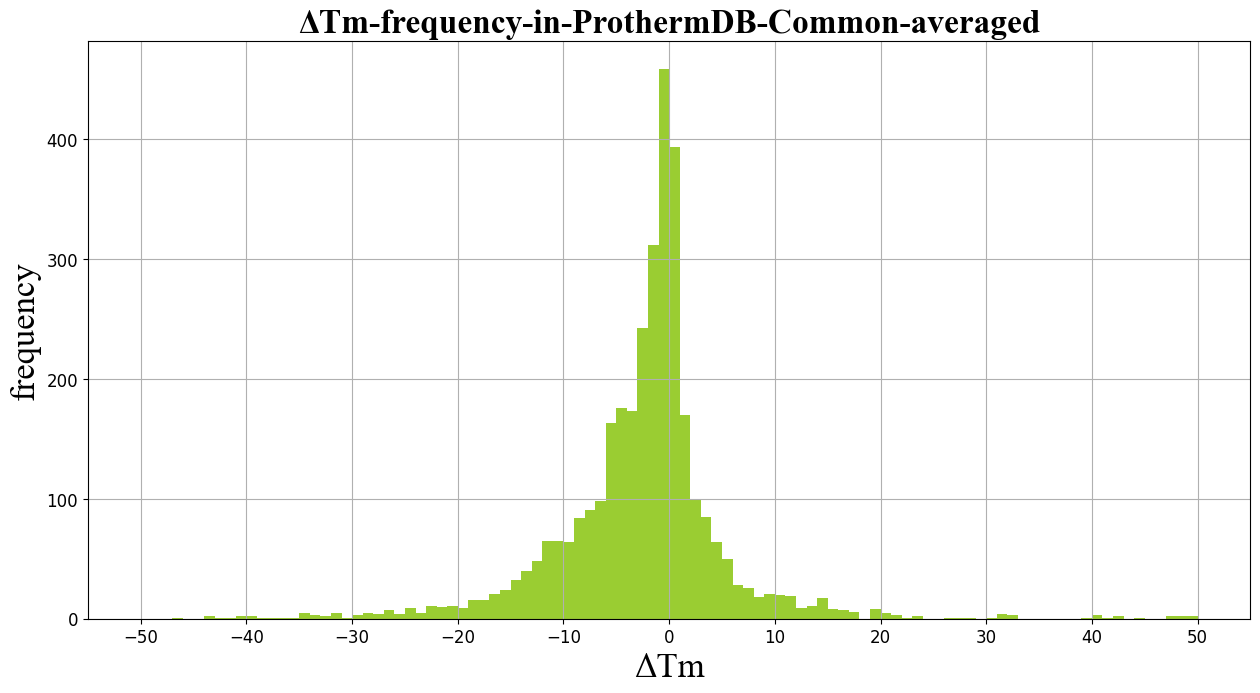

In [9]:
plt.figure(figsize=(15, 7.5), dpi=100, facecolor="white", edgecolor="black")
plt.hist(avg_ProThermDB["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-ProthermDB-Common-averaged",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 25, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 25, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

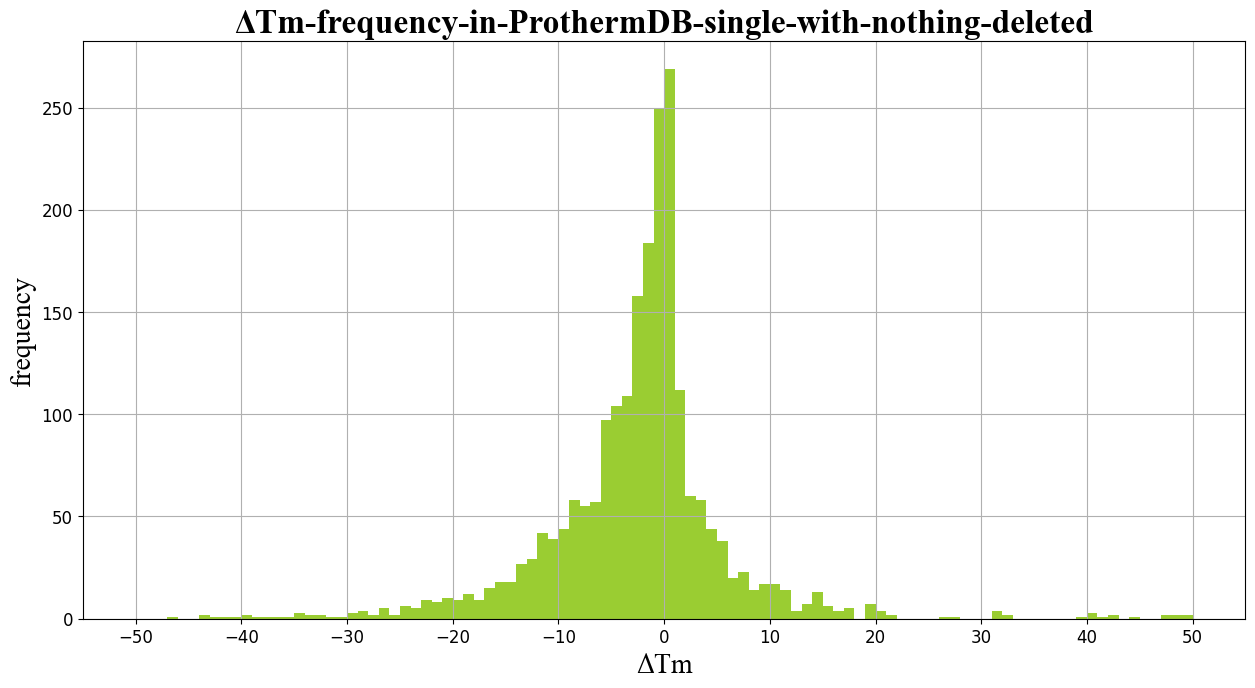

In [10]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(del_ProThermDB["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-ProthermDB-single-with-nothing-deleted",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

## 2.MPTherm-pred

In [11]:
MPTherm_pred = pd.read_csv("BasicData/InitializationDataset/MPTherm-pred.tsv", sep="\t")[columns + ["ΔTm", "Dataset type"]]
MPTherm_pred.sort_values(by=columns, inplace=True, ascending=False)
MPTherm_pred

,UniProt_ID,Mutation,ΔTm,Dataset type
485,W8VZW3,Y83A,-2.0,Training/CV
484,W8VZW3,W72A,-3.0,Training/CV
483,W8VZW3,F15A,0.0,Training/CV
704,Q9X1G6,Y130G,-9.2,Training/CV
703,Q9X1G6,Y130F,-3.5,Training/CV
...,...,...,...,...
660,A0A140NCX4,L425A,-6.8,Training/CV
55,A0A140NCX4,G69W,-23.1,Training/CV
622,A0A140NCX4,G51W,-3.5,Training/CV
452,A0A140NCX4,D73R,-20.0,Training/CV


### 2.1.MPTherm-pred 已经对多测量值数据进行了平均化，因此不存在多测量值数据

In [12]:
MPTherm_pred_mult_cnt, MPTherm_pred_mult_index = check4mult(MPTherm_pred, columns)
MPTherm_pred_multiple_deltaTm = MPTherm_pred.iloc[MPTherm_pred_mult_index, :]
MPTherm_pred_mult_cnt

0

### 2.2.分离MPTherm-pred测试集与训练集

In [13]:
MPTherm_pred_Testing = MPTherm_pred[MPTherm_pred["Dataset type"].str.contains("Test")][columns + ["ΔTm"]]
MPTherm_pred_Training = MPTherm_pred[MPTherm_pred["Dataset type"].str.contains("Training")][columns + ["ΔTm"]]
# MPTherm_pred_Testing.to_csv("BasicData/MPTherm-pred/MPTherm-pred_Testing.csv", index=False)
# MPTherm_pred_Training.to_csv("BasicData/MPTherm-pred/MPTherm-pred_Training.csv", index=False)

### 2.3绘制测试集与训练集的ΔTm分布

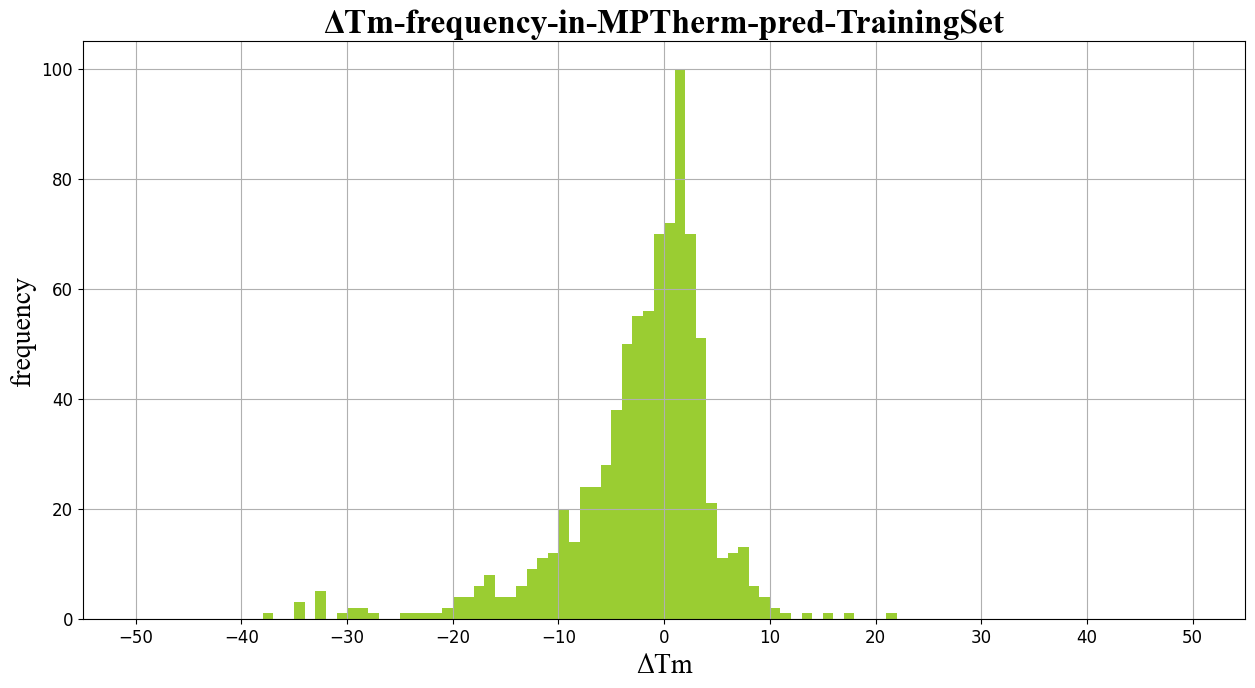

In [14]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(MPTherm_pred_Training["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-MPTherm-pred-TrainingSet",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
# plt.savefig("SavedPicture/MPTherm-pred/ΔTm-frequency-in-MPTherm-pred-TrainingSet-with-nothing.png", dpi=100)
plt.show()

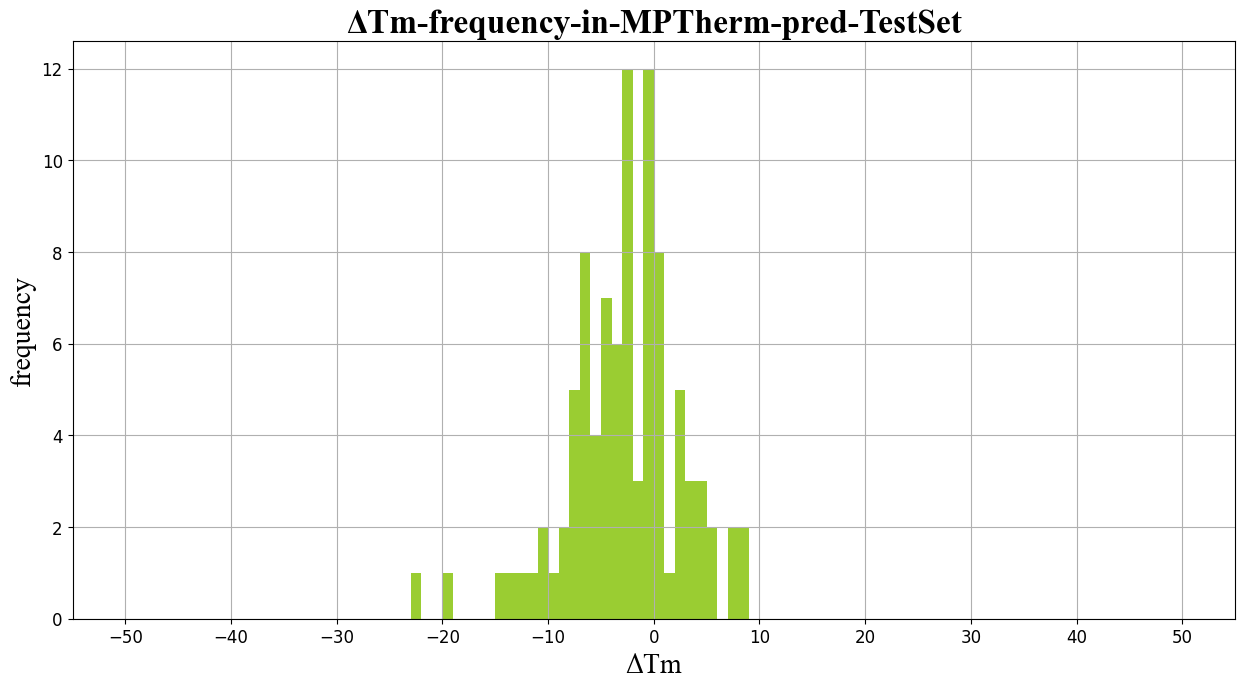

In [15]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(MPTherm_pred_Testing["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-MPTherm-pred-TestSet",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
# plt.savefig("SavedPicture/MPTherm-pred/ΔTm-frequency-in-MPTherm-pred-TestSet-with-no-thing.png", dpi=100)
plt.show()

## 3.MPThermDB

In [16]:
MPThermDB = pd.read_csv("BasicData/InitializationDataset/MPThermDB.tsv", sep="\t")[columns + ["ΔTm"]]
MPThermDB.sort_values(by=columns, inplace=True, ascending=False)
MPThermDB.reset_index(drop=True, inplace=True)
MPThermDB

,UniProt_ID,Mutation,ΔTm
0,W8VZW3,Y83A,-2.0
1,W8VZW3,W72A,-3.0
2,W8VZW3,F15A,0.0
3,Q9Y6R1-2,R298S,-5.0
4,Q9Y277,C8A,NaN
...,...,...,...
1862,A0A0E3N843,C557S,0.2
1863,A0A0C4MBH9,D404E,-6.4
1864,A0A0C4MBH9,D404A,-7.1
1865,A0A0C4MBH9,D146E,-5.5


### 3.1.清洗MPThermDB中的非法数据

In [17]:
MPThermDB, MPThermDb_washed = wash4MutTm(MPThermDB, avg_filling=False, focus_columns=columns)
MPThermDB

-删除数据缺失行及非法行共计117行
-丢弃pH/Tm的缺失值


,UniProt_ID,Mutation,ΔTm
0,W8VZW3,Y83A,-2.0
1,W8VZW3,W72A,-3.0
2,W8VZW3,F15A,0.0
3,Q9Y6R1-2,R298S,-5.0
4,Q9Y277,C8A,1.7
...,...,...,...
1745,A0A0E3N843,C557S,0.2
1746,A0A0C4MBH9,D404E,-6.4
1747,A0A0C4MBH9,D404A,-7.1
1748,A0A0C4MBH9,D146E,-5.5


### 3.2.检测是否存在多测量值

In [18]:
MPThermDB_mult_cnt, MPThermDB_mult_index = check4mult(MPThermDB, columns)
MPThermDB_multiple_deltaTm = MPThermDB.iloc[MPThermDB_mult_index, :]
print(f"MPThermDB数据库中存在{MPThermDB_mult_cnt}条多测量值")
MPThermDB_multiple_deltaTm

MPThermDB数据库中存在897条多测量值


,UniProt_ID,Mutation,ΔTm
41,Q97UY8,G144A,0.3
42,Q97UY8,G144A,1.0
43,Q97UY8,G144A,-0.9
44,Q97UY8,G144A,0.6
45,Q97UY8,G144A,0.6
...,...,...,...
1741,A0A0E3N843,C557S,3.0
1742,A0A0E3N843,C557S,1.1
1743,A0A0E3N843,C557S,2.9
1744,A0A0E3N843,C557S,11.8


### 3.2.1.删除所有多测量值

### 3.2.2.平均所有多测量值

In [19]:
del_MPThermDB = duplicate4MutTm(MPThermDB, mode="Delete", focus_columns=columns).reset_index(drop=True)
avg_MPThermDB = duplicate4MutTm(MPThermDB, mode="Average", focus_columns=columns).reset_index(drop=True)
avg_MPThermDB

,UniProt_ID,Mutation,ΔTm
0,A0A0C4MBH9,D146A,-5.3
1,A0A0C4MBH9,D146E,-5.5
2,A0A0C4MBH9,D404A,-7.1
3,A0A0C4MBH9,D404E,-6.4
4,A0A0E3N843,C557S,3.8
...,...,...,...
1136,Q9Y277,C8A,1.7
1137,Q9Y6R1-2,R298S,-5.0
1138,W8VZW3,F15A,0.0
1139,W8VZW3,W72A,-3.0


### 3.3.针对不同多测量值策略进行数据分析

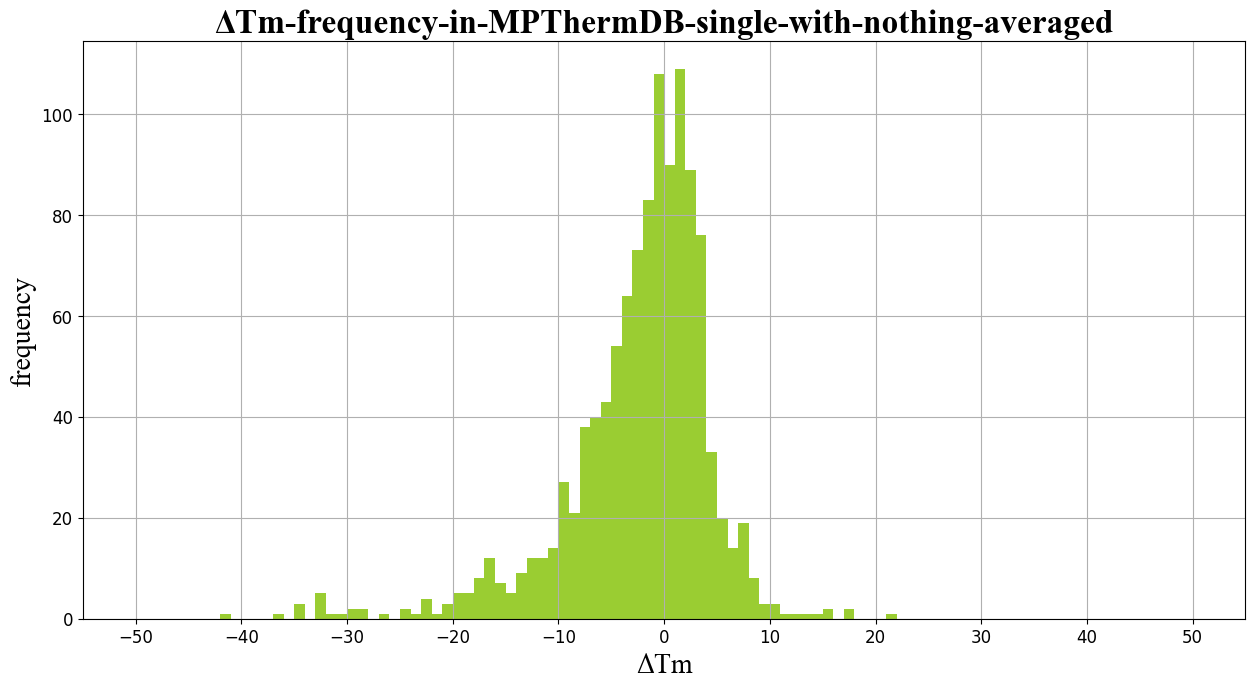

In [20]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(avg_MPThermDB["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-MPThermDB-single-with-nothing-averaged",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

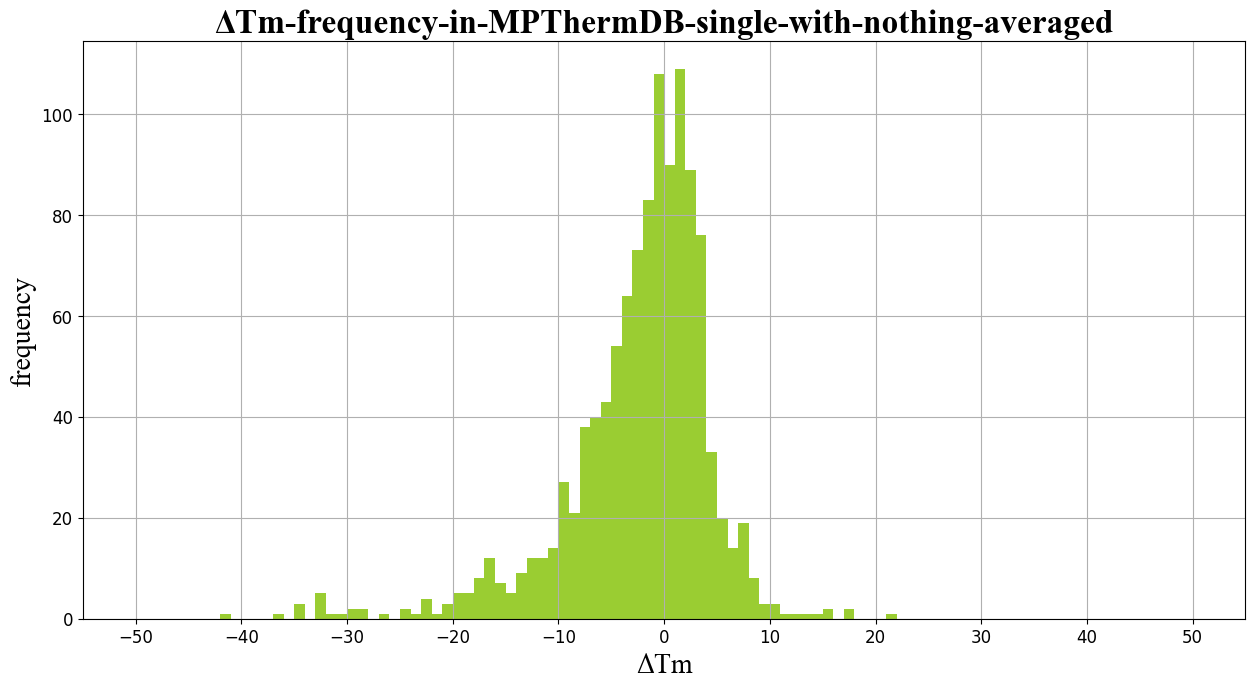

In [21]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(avg_MPThermDB["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-MPThermDB-single-with-nothing-averaged",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

## 4.HotMuSiC

In [22]:
HotMusic = pd.read_csv("BasicData/InitializationDataset/HotMuSiC_source.csv")[["PDBid", "RESN", "RESwt", "RESmut", "ΔTm"]]
pdb2uid_ref = json.load(open("./Process4Dataset/feature_extractor/IDConvert/pdb2uid.json", "r"))

### 4.1.PDBID转换为UniProtID
由于该数据库的映射关系与其他数据库存在差异，先进行处理

In [23]:
# PDBid转换为UniProt ID
import tqdm
def get_uniprot_id(pdb_id):
    return pdb2uid_ref[pdb_id] if pdb_id in pdb2uid_ref else "None"

# MutationInfoTrasfer
ref = {"ALA": "A", "ARG": "R", "ASN": "N", "ASP": "D", "CYS": "C", "GLN": "Q", "GLU": "E", "GLY": "G", "HIS": "H", "ILE": "I", "LEU": "L", "LYS": "K", "MET": "M", "PHE": "F", "PRO": "P", "SER": "S", "THR": "T", "TRP": "W", "TYR": "Y", "VAL": "V"}
def part2Mutation(animo_acid_from, animo_acid_to, animo_acid_position):
    try:
        return f"{ref[animo_acid_from]}{int(animo_acid_position)}{ref[animo_acid_to]}"
    except Exception:
        return "Fault"

In [24]:
HotMusic.insert(loc=HotMusic.shape[1], column="Mutation", value="")
for rowIndex, row in HotMusic.iterrows():
    HotMusic.loc[rowIndex, "Mutation"] =  part2Mutation(row["RESwt"], row["RESmut"], row["RESN"])

In [25]:
HotMusic.insert(loc=HotMusic.shape[1], column="UniProt_ID", value="")
deleteIndex = []
with tqdm.tqdm(total=HotMusic.shape[0]) as pbar:
    for rowIndex, row in HotMusic.iterrows():
        uid = get_uniprot_id(row["PDBid"])
        if uid == "None":
            deleteIndex.append(rowIndex)
        else:
            HotMusic.loc[rowIndex, "UniProt_ID"] =  uid
        pbar.update(1)
print(f"HotMusic中删除了{len(deleteIndex)} / {HotMusic.shape[0]}条由于PDBid无法转换为UniPortID的数据")
HotMusic.drop(index=deleteIndex, inplace=True)

100%|██████████| 1627/1627 [00:00<00:00, 18225.63it/s]

HotMusic中删除了384 / 1627条由于PDBid无法转换为UniPortID的数据


In [26]:
HotMusic = HotMusic[columns + ["ΔTm"]]
HotMusic.sort_values(by=columns, inplace=True, ascending=False)
HotMusic.reset_index(drop=True, inplace=True)
HotMusic

,UniProt_ID,Mutation,ΔTm
0,Q9ZEU2,Y147N,-1.0
1,Q9ZEU2,Y147F,-0.2
2,Q9ZEU2,Y147A,-1.0
3,Q9ZEU2,R509A,0.0
4,Q9ZEU2,R446F,0.2
...,...,...,...
1238,D4Z2G1,A129V,-1.5
1239,A8PUY1,N277V,-13.5
1240,A8PUY1,N277L,-12.0
1241,A8PUY1,N277F,-16.3


### 4.1.数据清洗
清洗HotMusic中的非法数据

In [27]:
HotMusic, HotMusic_washed = wash4MutTm(HotMusic, avg_filling=False, focus_columns=columns)
HotMusic_washed

-删除数据缺失行及非法行共计2行
-丢弃pH/Tm的缺失值


,UniProt_ID,Mutation,ΔTm
44,Q9ZEU2,Fault,-0.2
1173,D4Z2G1,Fault,0.0


### 4.2.检测是否存在多测量值

In [28]:
HotMusic_mult_cnt, HotMusic_mult_index = check4mult(HotMusic, columns)
HotMusic_multiple_deltaTm = HotMusic.iloc[HotMusic_mult_index, :]
print(f"HotMuSiC数据库中存在{HotMusic_mult_cnt}条多测量值")
HotMusic_multiple_deltaTm

HotMuSiC数据库中存在42条多测量值


,UniProt_ID,Mutation,ΔTm
137,P61626,V99A,-4.4
138,P61626,V99A,-3.0
140,P61626,V93A,-4.4
141,P61626,V93A,-2.3
152,P61626,V74A,-1.9
153,P61626,V74A,-1.1
164,P61626,V2A,-7.9
165,P61626,V2A,-4.6
166,P61626,V130A,-4.8
167,P61626,V130A,-2.6


### 4.3.对多测量值进行处理

In [29]:
del_HotMusic = duplicate4MutTm(HotMusic, mode="Delete", focus_columns=columns).reset_index(drop=True)
avg_HotMusic = duplicate4MutTm(HotMusic, mode="Average", focus_columns=columns).reset_index(drop=True)
avg_HotMusic

,UniProt_ID,Mutation,ΔTm
0,A8PUY1,N277D,2.0
1,A8PUY1,N277F,-16.3
2,A8PUY1,N277L,-12.0
3,A8PUY1,N277V,-13.5
4,D4Z2G1,A129V,-1.5
...,...,...,...
1215,Q9ZEU2,R446F,0.2
1216,Q9ZEU2,R509A,0.0
1217,Q9ZEU2,Y147A,-1.0
1218,Q9ZEU2,Y147F,-0.2


### 4.4.绘制HotMusic分布图

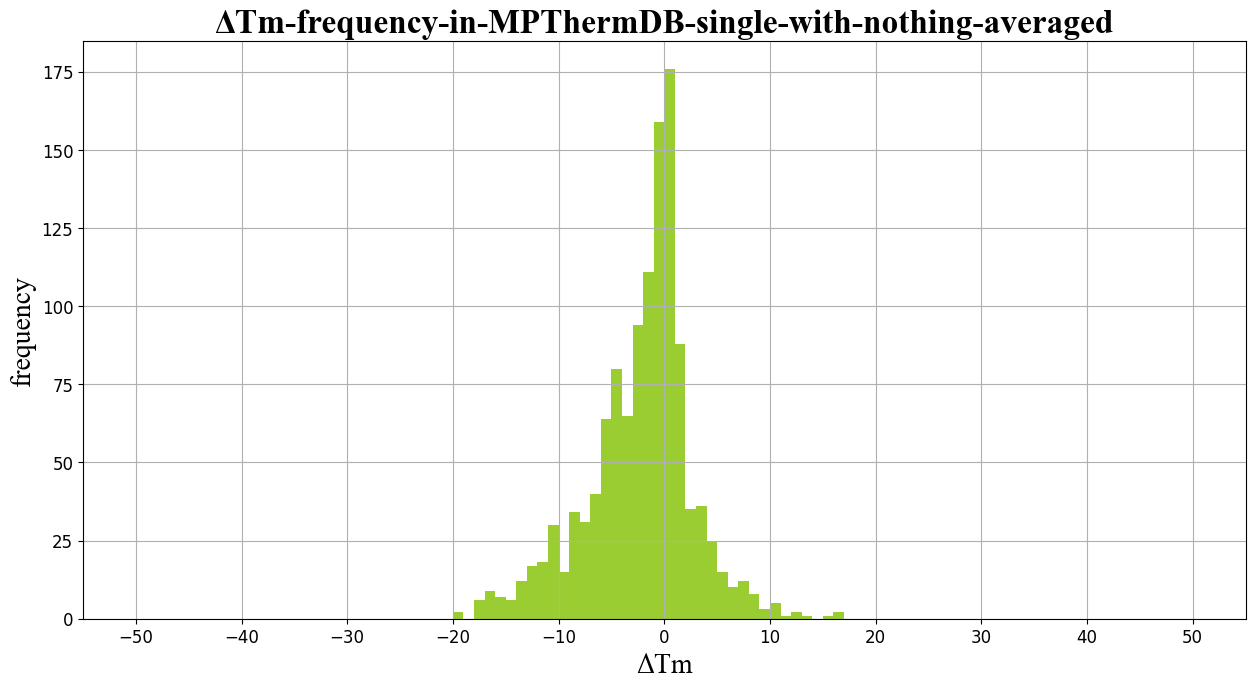

In [30]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(avg_HotMusic["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-MPThermDB-single-with-nothing-averaged",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

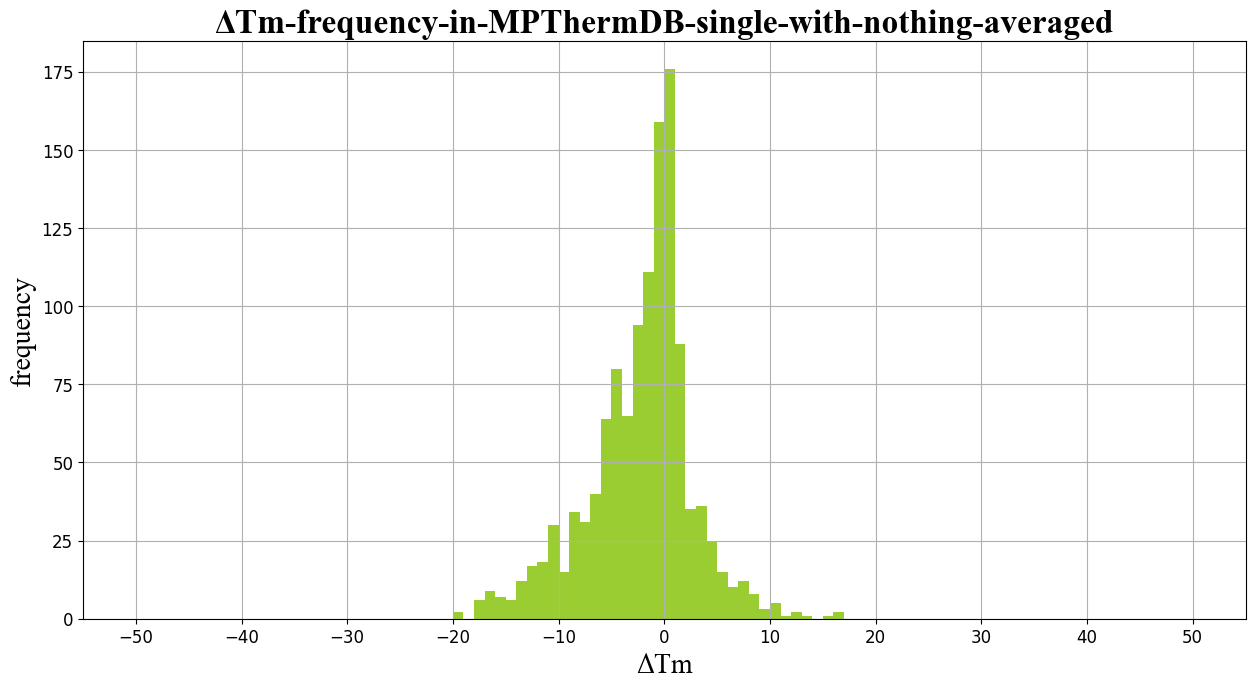

In [31]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(avg_HotMusic["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-MPThermDB-single-with-nothing-averaged",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

## 5.各数据集之间的引用关系[以ProThermDB为基本数据集]

In [32]:
def Check4Dup(base_df: pd.DataFrame,
              quote_df: pd.DataFrame,
              focus_colums: list = None) -> list:
    if focus_colums is None:
        focus_colums = ["UniProt_ID", "Mutation"]
    
    # 后一数据集出现了多少个条目组合
    occured = set()
    for rowIndex, row in base_df[focus_colums].iterrows():
        occured.add("-".join(map(str, row)))
    
    # 前一数据集中出现过多少个条目组合
    indexs = []
    for rowIndex, row in quote_df[focus_colums].iterrows():
        if "-".join(map(str, row)) in occured:
            indexs .append(rowIndex)
    return indexs

### 5.1.MPThermDB对ProThermDB的引用关系

In [33]:
MPThermDB_ProThermDb_duplicateIndex = Check4Dup(avg_ProThermDB, avg_MPThermDB)
print(f"MPThermDB中的{len(MPThermDB_ProThermDb_duplicateIndex)}条数据来源于ProThermDB")
MPThermDB_ProThermDb_duplicated = avg_MPThermDB.iloc[MPThermDB_ProThermDb_duplicateIndex, :]
MPThermDB_ProThermDb_duplicated

MPThermDB中的37条数据来源于ProThermDB


,UniProt_ID,Mutation,ΔTm
115,P00171,F40H,-12.450000
116,P00171,F40L,-7.500000
117,P00171,F40Y,0.550000
121,P00171,V66E,-4.000000
122,P00171,V66H,-5.900000
123,P00171,V66K,-8.700000
124,P00171,V66Y,-4.700000
137,P02730,E40K,-0.950000
138,P02730,G130R,-0.500000
139,P02730,K56E,-0.500000


### 5.2.MPTherm-pred对MPThermDB的引用关系

In [34]:
pred_MPThermDB_duplicateIndex = Check4Dup(avg_MPThermDB, MPTherm_pred)
print(f"MPTherm-pred中的{len(pred_MPThermDB_duplicateIndex)}来源于MPThermDB")
test_MPThermDB_duplicateIndex = Check4Dup(avg_MPThermDB, MPTherm_pred_Testing)
print(f"MPTherm-pred-Testing中的{len(test_MPThermDB_duplicateIndex)}来源于MPThermDB")

MPTherm-pred中的928来源于MPThermDB
MPTherm-pred-Testing中的94来源于MPThermDB


### 5.3.HotMusic对ProThermDB的引用关系

In [35]:
HotMusic_ProThermDB_duplicateIndex = Check4Dup(avg_ProThermDB, avg_HotMusic)
print("HotMusic采用了ProThermDB中的{}条数据".format(len(HotMusic_ProThermDB_duplicateIndex)))

HotMusic采用了ProThermDB中的544条数据


### 5.4.HotMusic对MPTehrmDB的引用量

In [36]:
HotMusic_MPThermDB_duplicateIndex = Check4Dup(avg_MPThermDB, avg_HotMusic)
print("HotMusic采用了MPThermDB中的{}条数据".format(len(HotMusic_MPThermDB_duplicateIndex)))

HotMusic采用了MPThermDB中的0条数据


## 6.为研究全全体球蛋白预测-在ProthermDB数据集中分割一个测试集

### 6.2.删除对MPThermDB、MPTherm-pred、HotMusic的引用

In [37]:
excllent_ProThermDB = avg_ProThermDB.copy()
excllent_ProThermDB = delete4Dup(excllent_ProThermDB, avg_MPThermDB, columns)
excllent_ProThermDB = delete4Dup(excllent_ProThermDB, avg_HotMusic, columns)
excllent_ProThermDB = delete4Dup(excllent_ProThermDB, MPTherm_pred, columns)
excllent_ProThermDB

-前一数据集采用了后一数据集中的37条数据，现已删除
-前一数据集采用了后一数据集中的544条数据，现已删除
-前一数据集采用了后一数据集中的1条数据，现已删除


,UniProt_ID,Mutation,ΔTm
0,A0A060GYS1,H22R,9.9
1,A0A060GYS1,P224R,2.3
2,A0A410ZNC6,A341S,3.6
3,A0A410ZNC6,F184L,1.0
4,A0A410ZNC6,P250L,4.5
...,...,...,...
2826,R9S082,T68A,-0.5
2827,R9S082,V115A,-2.9
2828,R9S082,V14A,-1.3
2829,R9S082,V67A,1.4


### 6.3.生成数据集中UniProt_ID => PDB_ID唯一映射的测试集合，大小取~300

In [38]:
indexs = []
for rowIndex, row in excllent_ProThermDB.iterrows():
    if ":".join((row["UniProt_ID"], row["Mutation"])) in ProThermDB_UniPDB:
        indexs.append(rowIndex)
excllent_ProThermDB_for_Testing = excllent_ProThermDB.iloc[indexs, :]
excllent_ProThermDB_for_Testing

,UniProt_ID,Mutation,ΔTm
10,A5H7H0,D119K,0.25
11,A5H7H0,D210A,-2.17
12,A5H7H0,D210S,-1.25
13,A5H7H0,H116A,0.4
14,A5H7H0,H116S,-0.07
...,...,...,...
2825,R9S082,T52A,-2.8
2826,R9S082,T68A,-0.5
2827,R9S082,V115A,-2.9
2828,R9S082,V14A,-1.3


In [39]:
from sklearn.model_selection import train_test_split

_, excllent_ProThermDB_Testing = train_test_split(excllent_ProThermDB_for_Testing, test_size=0.1, random_state=0)   # 从可独立映射的数据集中抽取测试集
excllent_ProThermDB_Training = excllent_ProThermDB.drop(excllent_ProThermDB_Testing.index).reset_index(drop=True)   # 在全数据集上去除测试集即得到训练集
excllent_ProThermDB_Testing.reset_index(drop=True, inplace=True)
excllent_ProThermDB_Training

,UniProt_ID,Mutation,ΔTm
0,A0A060GYS1,H22R,9.9
1,A0A060GYS1,P224R,2.3
2,A0A410ZNC6,A341S,3.6
3,A0A410ZNC6,F184L,1.0
4,A0A410ZNC6,P250L,4.5
...,...,...,...
2559,R9S082,T68A,-0.5
2560,R9S082,V115A,-2.9
2561,R9S082,V14A,-1.3
2562,R9S082,V67A,1.4


In [40]:
excllent_ProThermDB_Testing

,UniProt_ID,Mutation,ΔTm
0,P03050,S5A,-1.5
1,Q13526,T29A,-14.3
2,P07845,Y111N,0.0
3,P00711,D106N,19.6
4,Q15059,H395R,-2.6
...,...,...,...
262,P61495,H179K,-1.05
263,P00044,F16M,-15.2
264,P00644,T144Q,-12.95
265,P05798,L21A,-1.6


### 6.4.生成包含(PDB_ID, PDB_Mutation, PDB_Chain)的数据集用于与之前预测器进行比较

In [41]:
excllent_ProThermDB_Testing4Comparison = excllent_ProThermDB_Testing.copy()
excllent_ProThermDB_Testing4Comparison["PDB_Chain_Mutation"] = excllent_ProThermDB_Testing4Comparison.apply(lambda row: ProThermDB_UniPDB[row["UniProt_ID"] + ":" + row["Mutation"]], axis=1)
excllent_ProThermDB_Testing4Comparison

,UniProt_ID,Mutation,ΔTm,PDB_Chain_Mutation
0,P03050,S5A,-1.5,1arr_A:S5A
1,Q13526,T29A,-14.3,1pin_A:T29A
2,P07845,Y111N,0.0,1gwy_A:Y111N
3,P00711,D106N,19.6,1hfz_A:D87N
4,Q15059,H395R,-2.6,3s92_A:H395R
...,...,...,...,...
262,P61495,H179K,-1.05,1osi_A:H179K
263,P00044,F16M,-15.2,1ycc_A:F10M
264,P00644,T144Q,-12.95,1stn_A:T62Q
265,P05798,L21A,-1.6,1rgg_A:L21A


### 6.4.存储ProThermDB训练/测试数据集

In [42]:
# excllent_ProThermDB_Training.to_csv("BasicData/ProThermDB/common/excllent_ProThermDB_Training.csv", index=False)
# excllent_ProThermDB_Testing.to_csv("BasicData/ProThermDB/common/excllent_ProThermDB_Testing.csv", index=False)
# excllent_ProThermDB_Testing4Comparison.to_csv("BasicData/ProThermDB/common/excllent_ProThermDB_Testing4Comparison.csv", index=False)

## 7.拼接所有可用数据为PonDB

In [43]:
PonDB = pd.concat([avg_HotMusic, avg_MPThermDB, avg_ProThermDB, MPTherm_pred_Training], axis=0, ignore_index=True).drop_duplicates(subset=columns, keep=False).reset_index(drop=True)
PonDB = delete4Dup(PonDB, MPTherm_pred_Testing, columns)
PonDB = delete4Dup(PonDB, excllent_ProThermDB_Testing, columns)
PonDB

-前一数据集采用了后一数据集中的89条数据，现已删除
-前一数据集采用了后一数据集中的267条数据，现已删除


,UniProt_ID,Mutation,ΔTm
0,A8PUY1,N277D,2.0
1,A8PUY1,N277F,-16.3
2,A8PUY1,N277L,-12.0
3,A8PUY1,N277V,-13.5
4,O68541,D348G,-4.5
...,...,...,...
3434,R9S082,T68A,-0.5
3435,R9S082,V115A,-2.9
3436,R9S082,V14A,-1.3
3437,R9S082,V67A,1.4


In [44]:
# PonDB.to_csv("BasicData/PonDB/common/PonDB.csv", index=False)

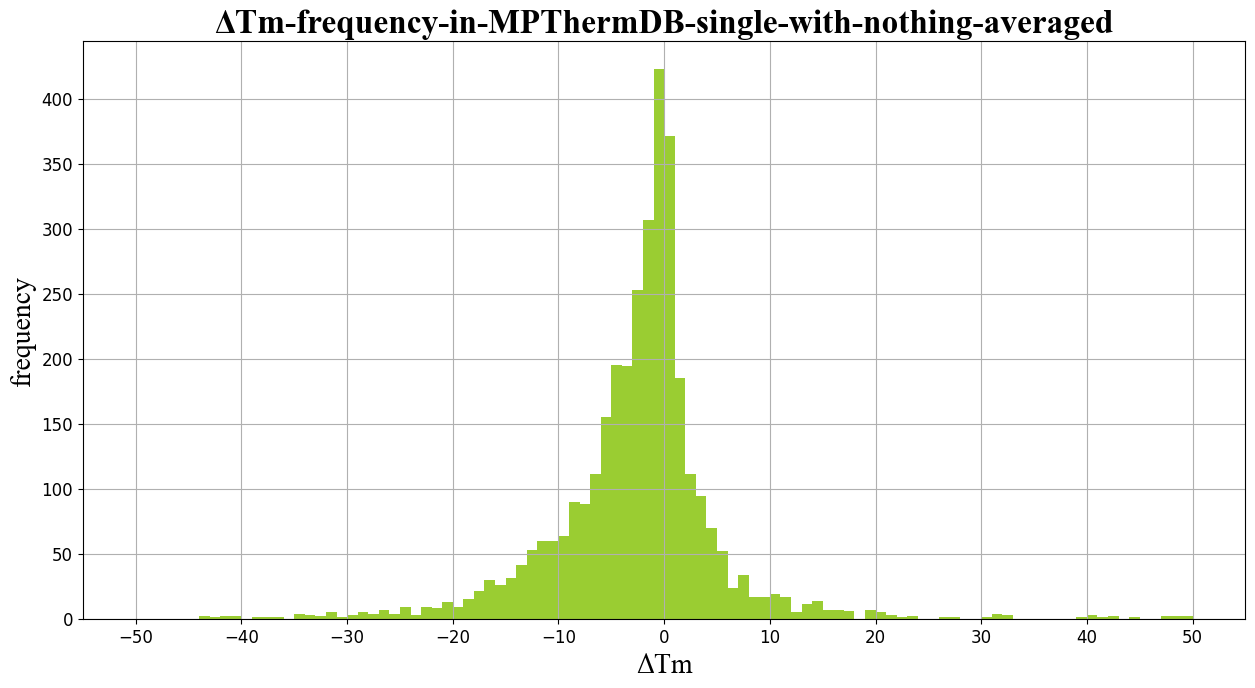

In [45]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(PonDB["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-MPThermDB-single-with-nothing-averaged",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

## 8.数据验证

In [46]:
avg_ProThermDB

,UniProt_ID,Mutation,ΔTm
0,A0A060GYS1,H22R,9.9
1,A0A060GYS1,P224R,2.3
2,A0A410ZNC6,A341S,3.6
3,A0A410ZNC6,F184L,1.0
4,A0A410ZNC6,P250L,4.5
...,...,...,...
3408,R9S082,T68A,-0.5
3409,R9S082,V115A,-2.9
3410,R9S082,V14A,-1.3
3411,R9S082,V67A,1.4


In [47]:
avg_HotMusic

,UniProt_ID,Mutation,ΔTm
0,A8PUY1,N277D,2.0
1,A8PUY1,N277F,-16.3
2,A8PUY1,N277L,-12.0
3,A8PUY1,N277V,-13.5
4,D4Z2G1,A129V,-1.5
...,...,...,...
1215,Q9ZEU2,R446F,0.2
1216,Q9ZEU2,R509A,0.0
1217,Q9ZEU2,Y147A,-1.0
1218,Q9ZEU2,Y147F,-0.2


In [48]:
PonDB

,UniProt_ID,Mutation,ΔTm
0,A8PUY1,N277D,2.0
1,A8PUY1,N277F,-16.3
2,A8PUY1,N277L,-12.0
3,A8PUY1,N277V,-13.5
4,O68541,D348G,-4.5
...,...,...,...
3434,R9S082,T68A,-0.5
3435,R9S082,V115A,-2.9
3436,R9S082,V14A,-1.3
3437,R9S082,V67A,1.4


In [50]:
PonDB["ΔTm"].var()

84.07698553586073